In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bs4, requests

In [10]:
employment_df = pd.read_csv("./Data/employment-data.csv")
employment_df.head()

,Row Labels,Count of Current Location,Unnamed: 2,Unnamed: 3,Rank,Frequency
0,Chennai,29647.0,0.650724,NaN,1.0,29647.0
1,Coimbatore,3596.0,0.078929,NaN,2.0,3596.0
2,Trichy,2092.0,NaN,NaN,3.0,2092.0
3,Madurai,1460.0,NaN,NaN,4.0,1460.0
4,Salem,1361.0,NaN,NaN,5.0,1361.0


In [3]:
employment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45563 entries, 0 to 45562
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Serial Number          45563 non-null  int64  
 1   Name of the Candidate  45524 non-null  object 
 2   Resume ID              45563 non-null  object 
 3   Postal Address         45563 non-null  object 
 4   Telephone No.          18609 non-null  object 
 5   Mobile No.             45525 non-null  float64
 6   Date of Birth          40908 non-null  object 
 7   Email                  45563 non-null  object 
 8   Work Experience        45563 non-null  object 
 9   Resume Title           45562 non-null  object 
 10  Current Location       45560 non-null  object 
 11  Preferred Location     40691 non-null  object 
 12  Current Employer       26906 non-null  object 
 13  Current Designation    26808 non-null  object 
 14  Annual Salary          45044 non-null  object 
 15  U.

In [78]:
sachin_ODI_data = pd.read_csv("./Data/tendulkar_ODI.csv")
sachin_ODI_data

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,291,18,21,14,2,0,128.57,2,caught,2,v Sri Lanka,Mumbai,2-Apr-11
291,292,2,9,6,0,0,33.33,2,caught,2,v Australia,Melbourne,5-Feb-12
292,293,3,21,12,0,0,25,2,caught,2,v Australia,Brisbane,19-Feb-12
293,294,14,34,15,2,0,93.33,2,run out,2,v Australia,Sydney,26-Feb-12


In [79]:
sachin_ODI_data.rename(columns={'Unnamed: 0': 'Row Label'}, inplace=True)
sachin_ODI_data.set_index(keys=['Row Label'], inplace=True)
sachin_ODI_data

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
Row Label,,,,,,,,,,,,
1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90
...,...,...,...,...,...,...,...,...,...,...,...,...
291,18,21,14,2,0,128.57,2,caught,2,v Sri Lanka,Mumbai,2-Apr-11
292,2,9,6,0,0,33.33,2,caught,2,v Australia,Melbourne,5-Feb-12
293,3,21,12,0,0,25,2,caught,2,v Australia,Brisbane,19-Feb-12


In [80]:
sachin_ODI_data.isnull().sum()

Runs          0
Mins          0
BF            0
4s            0
6s            0
SR            0
Pos           0
Dismissal     0
Inns          0
Opposition    0
Ground        0
Start Date    0
dtype: int64

In [81]:
sachin_ODI_data.groupby(by='Runs').sum()

,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
Runs,,,,,,,,,,,
0,-2637121029776,2224445310536,000000000000,000000000000,000000000000,552222244224,caughtcaughtcaughtcaughtcaughtbowledcaughtcaug...,222222122121,v Pakistanv New Zealandv Sri Lankav West Indie...,GujranwalaDunedinColombo (SSC)FaridabadMumbaiB...,18-Dec-891-Mar-9017-Sep-9417-Oct-9420-Oct-9423...
1,-910141814171841131221713413,35541114112231191361038,0000000000000000,0000000000000000,33.332020259.097.149.09504.349.0911.117.6916.6...,4552241222443233,caughtlbwcaughtbowledcaughtbowledcaughtcaughtc...,1212111111221122,v South Africav Englandv Sri Lankav New Zealan...,New DelhiChandigarhRajkotMumbai (BS)Manchester...,14-Nov-9121-Jan-9315-Feb-9429-Nov-9526-May-962...
10,-4623,362617,022,000,27.7738.4658.82,422,caughtcaughtcaught,111,v South Africav Australiav Australia,Port ElizabethMohaliGuwahati,9-Dec-9229-Oct-068-Nov-09
100,132158188,89119113,5910,711,112.3584.0388.49,222,caughtcaughtlbw,211,v Australiav Australiav Pakistan,KanpurGwaliorPeshawar,7-Apr-9826-Oct-036-Feb-06
100*,156110,10376,1310,01,97.08131.57,24,not outnot out,21,v Kenyav West Indies,KolkataVadodara,31-May-9831-Jan-07
...,...,...,...,...,...,...,...,...,...,...,...
96*,187,104,13,0,92.3,2,not out,2,v Sri Lanka,Cuttack,21-Dec-09
97,149,102,16,0,95.09,2,bowled,2,v Pakistan,Gwalior,15-Nov-07
99,158130,11291,1514,11,88.39108.79,22,caughtcaught,11,v Englandv Pakistan,BristolMohali,24-Aug-078-Nov-07


In [82]:
sachin_ODI_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 1 to 295
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        295 non-null    object
 1   Mins        295 non-null    object
 2   BF          295 non-null    object
 3   4s          295 non-null    object
 4   6s          295 non-null    object
 5   SR          295 non-null    object
 6   Pos         295 non-null    object
 7   Dismissal   295 non-null    object
 8   Inns        295 non-null    object
 9   Opposition  295 non-null    object
 10  Ground      295 non-null    object
 11  Start Date  295 non-null    object
dtypes: object(12)
memory usage: 30.0+ KB


In [83]:
sachin_ODI_data = sachin_ODI_data.loc[~((sachin_ODI_data['Runs'] == 'DNB') | ( sachin_ODI_data['Runs'] == 'TDNB')) ]

In [84]:
sachin_ODI_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 1 to 295
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        292 non-null    object
 1   Mins        292 non-null    object
 2   BF          292 non-null    object
 3   4s          292 non-null    object
 4   6s          292 non-null    object
 5   SR          292 non-null    object
 6   Pos         292 non-null    object
 7   Dismissal   292 non-null    object
 8   Inns        292 non-null    object
 9   Opposition  292 non-null    object
 10  Ground      292 non-null    object
 11  Start Date  292 non-null    object
dtypes: object(12)
memory usage: 29.7+ KB


In [85]:
sachin_ODI_data.groupby(by='Runs').sum()

,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
Runs,,,,,,,,,,,
0,-2637121029776,2224445310536,000000000000,000000000000,000000000000,552222244224,caughtcaughtcaughtcaughtcaughtbowledcaughtcaug...,222222122121,v Pakistanv New Zealandv Sri Lankav West Indie...,GujranwalaDunedinColombo (SSC)FaridabadMumbaiB...,18-Dec-891-Mar-9017-Sep-9417-Oct-9420-Oct-9423...
1,-910141814171841131221713413,35541114112231191361038,0000000000000000,0000000000000000,33.332020259.097.149.09504.349.0911.117.6916.6...,4552241222443233,caughtlbwcaughtbowledcaughtbowledcaughtcaughtc...,1212111111221122,v South Africav Englandv Sri Lankav New Zealan...,New DelhiChandigarhRajkotMumbai (BS)Manchester...,14-Nov-9121-Jan-9315-Feb-9429-Nov-9526-May-962...
10,-4623,362617,022,000,27.7738.4658.82,422,caughtcaughtcaught,111,v South Africav Australiav Australia,Port ElizabethMohaliGuwahati,9-Dec-9229-Oct-068-Nov-09
100,132158188,89119113,5910,711,112.3584.0388.49,222,caughtcaughtlbw,211,v Australiav Australiav Pakistan,KanpurGwaliorPeshawar,7-Apr-9826-Oct-036-Feb-06
100*,156110,10376,1310,01,97.08131.57,24,not outnot out,21,v Kenyav West Indies,KolkataVadodara,31-May-9831-Jan-07
...,...,...,...,...,...,...,...,...,...,...,...
94,120,81,16,1,116.04,2,caught,2,v England,The Oval,5-Sep-07
95,157,104,16,1,91.34,2,caught,2,v Pakistan,Lahore,13-Feb-06
96*,187,104,13,0,92.3,2,not out,2,v Sri Lanka,Cuttack,21-Dec-09


In [86]:
sachin_ODI_data['Runs'] = sachin_ODI_data['Runs'].str.replace('*','')
sachin_ODI_data

C:\Users\window 10\AppData\Local\Temp\ipykernel_10540\3748951556.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sachin_ODI_data['Runs'] = sachin_ODI_data['Runs'].str.replace('*','')
C:\Users\window 10\AppData\Local\Temp\ipykernel_10540\3748951556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sachin_ODI_data['Runs'] = sachin_ODI_data['Runs'].str.replace('*','')


,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
Row Label,,,,,,,,,,,,
1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90
...,...,...,...,...,...,...,...,...,...,...,...,...
291,18,21,14,2,0,128.57,2,caught,2,v Sri Lanka,Mumbai,2-Apr-11
292,2,9,6,0,0,33.33,2,caught,2,v Australia,Melbourne,5-Feb-12
293,3,21,12,0,0,25,2,caught,2,v Australia,Brisbane,19-Feb-12


In [87]:
sachin_ODI_data.groupby(by='Runs')['Runs'].count()

Runs
0      12
1      16
10      3
100     5
101     1
       ..
94      1
95      1
96      1
97      1
99      2
Name: Runs, Length: 105, dtype: int64

In [109]:
sachin_ODI_data['Runs']= sachin_ODI_data['Runs'].astype(dtype='int32')

C:\Users\window 10\AppData\Local\Temp\ipykernel_10540\4220440601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sachin_ODI_data['Runs']= sachin_ODI_data['Runs'].astype(dtype='int32')


In [110]:
sachin_ODI_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 1 to 295
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        292 non-null    int32 
 1   Mins        292 non-null    object
 2   BF          292 non-null    object
 3   4s          292 non-null    object
 4   6s          292 non-null    object
 5   SR          292 non-null    object
 6   Pos         292 non-null    object
 7   Dismissal   292 non-null    object
 8   Inns        292 non-null    object
 9   Opposition  292 non-null    object
 10  Ground      292 non-null    object
 11  Start Date  292 non-null    object
dtypes: int32(1), object(11)
memory usage: 28.5+ KB


In [111]:
sachin_ODI_data.sort_values(by='Runs', ascending=True)

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
Row Label,,,,,,,,,,,,
1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
138,0,2,3,0,0,0,4,caught,2,v New Zealand,Delhi,17-Nov-99
231,0,6,6,0,0,0,4,caught,1,v West Indies,Cuttack,24-Jan-07
91,0,12,4,0,0,0,2,bowled,2,v South Africa,Bloemfontein,23-Jan-97
128,0,10,5,0,0,0,2,caught,1,v New Zealand,Taupo,9-Jan-99
...,...,...,...,...,...,...,...,...,...,...,...,...
152,146,200,153,15,2,95.42,2,caught,1,v Zimbabwe,Jodhpur,8-Dec-00
267,163,206,133,16,5,122.55,2,retired notout,1,v New Zealand,Christchurch,8-Mar-09
274,175,210,141,19,4,124.11,2,caught,2,v Australia,Hyderabad (Deccan),5-Nov-09


<Figure size 640x480 with 0 Axes>

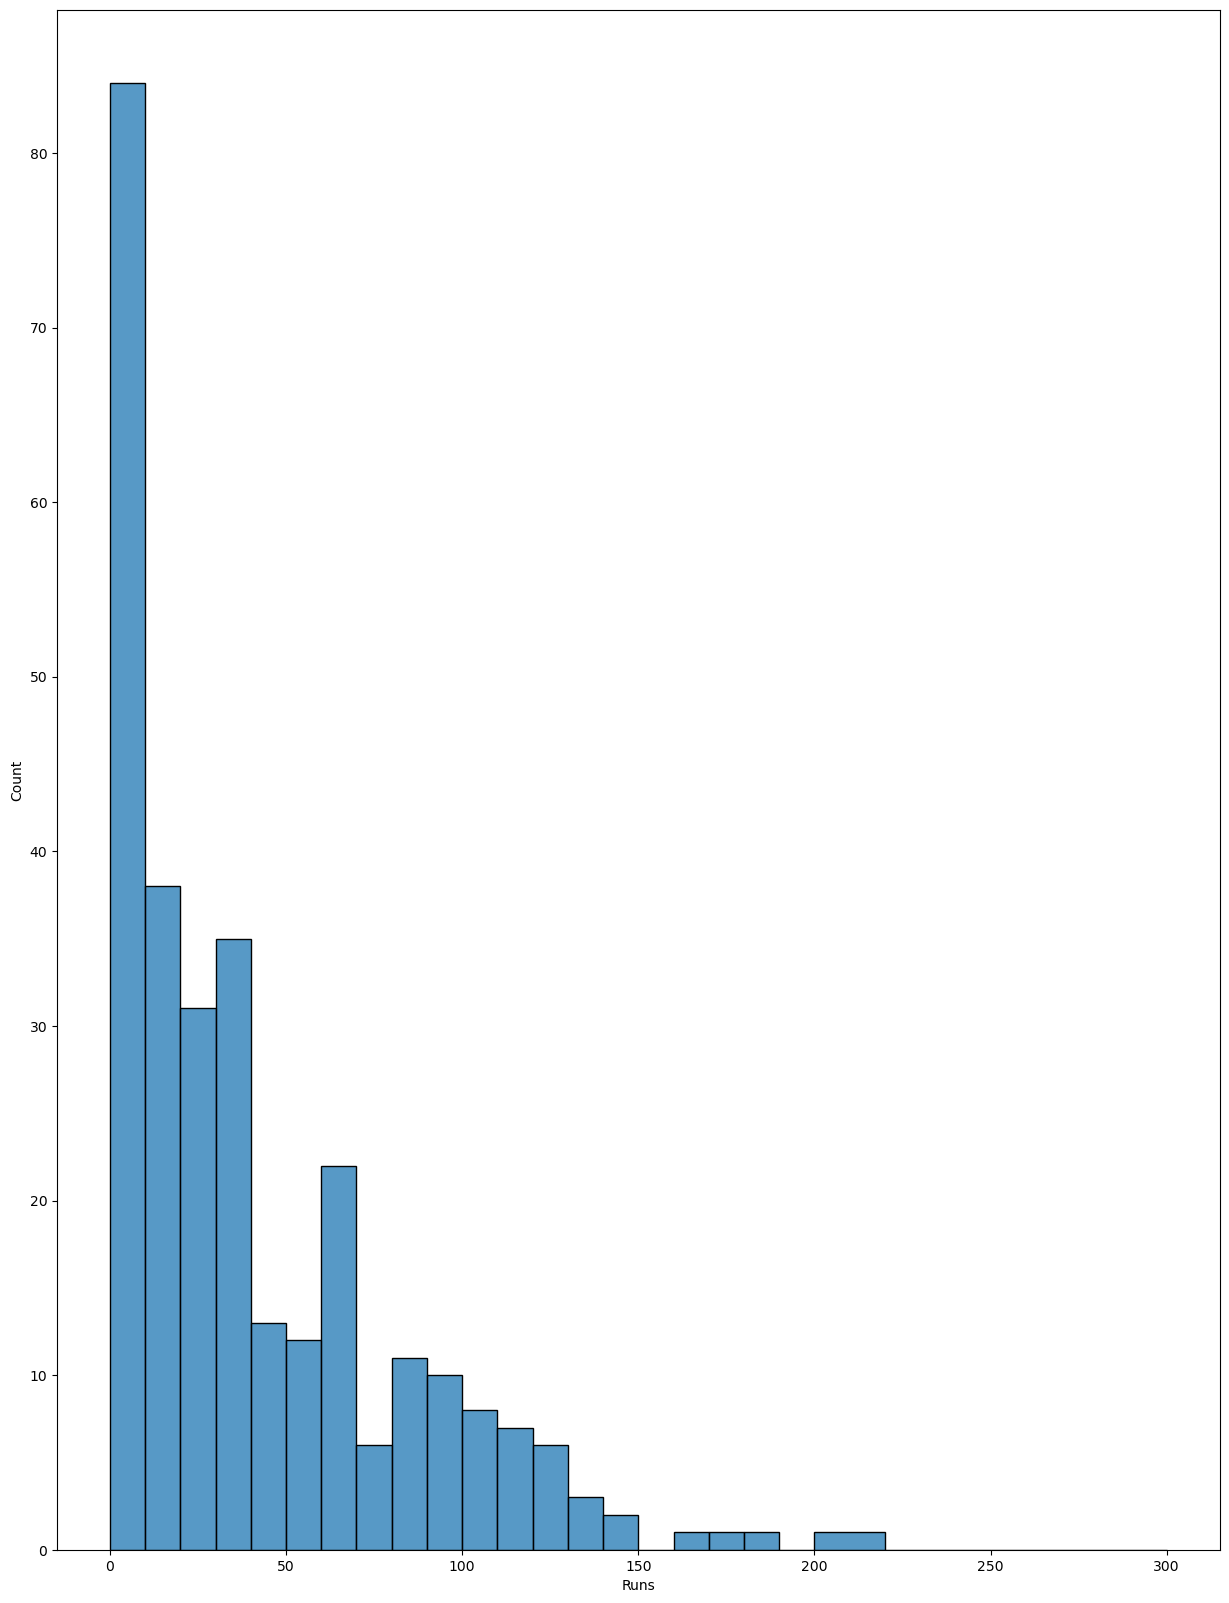

In [122]:
plt.figure(1)
plt.figure(figsize=(15,20))
_bins= [0, 10, 20, 30, 40,50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 220, 250, 300]
sns.histplot(x=sachin_ODI_data['Runs'], bins=_bins)
plt.show()

In [131]:
sachin_ODI_data['4s'] = sachin_ODI_data['4s'].astype(dtype='int32')

C:\Users\window 10\AppData\Local\Temp\ipykernel_10540\2412866570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sachin_ODI_data['4s'] = sachin_ODI_data['4s'].astype(dtype='int32')


In [132]:
sachin_ODI_data.sort_values(by='4s').groupby(by='4s')['4s'].count()

4s
0     69
1     37
2     29
3     25
4     17
5     16
6     14
7     13
8     13
9     15
10    11
11     4
12     5
13     8
14     3
15     4
16     4
17     1
19     2
20     1
25     1
Name: 4s, dtype: int64

<Figure size 640x480 with 0 Axes>

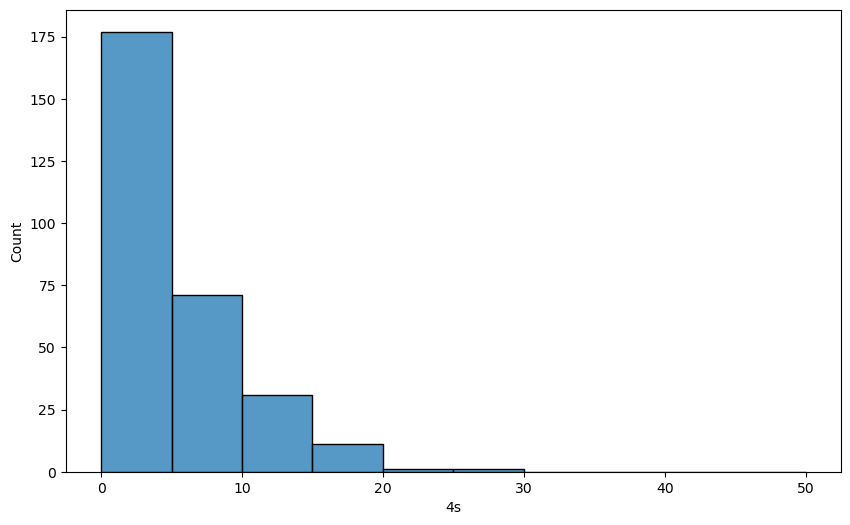

In [137]:
plt.figure(1)
plt.figure(figsize=(10, 6))
_bins= [0, 5, 10, 15, 20, 25, 30, 40, 45, 50]
sns.histplot(x=sachin_ODI_data['4s'], bins=_bins)
plt.show()